In [1]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from generate_global_features_2 import generate_global_features

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [ ]:
# Randomly select n species from dataset

n = 5
data_dirs = util.choose_species(n)

for dir in data_dirs:
    print(dir)
    

In [26]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'spec_cent'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'song'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

print(labels_dict)
print(labels)
print(data[:5])

{'Xenops Minutus': 1, 'Trogon Surrucura': 0, 'Anthus Lutescens': 2, 'Ramphocelus Bresilius': 4, 'Muscipipra Vetula': 3}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[ 2113.53822968   446.95104203  2798.04703995  1370.01760859]
 [ 2657.03321263   666.30279115  3714.95899002  1485.26237429]
 [ 2301.08659716   534.62718222  3189.31862584  1375.15816722]
 [ 2075.44691109   503.21048715  3051.05852448  1291.42392255]
 [ 2929.5594824    635.93924055  3857.30070328  1450.59288863]]


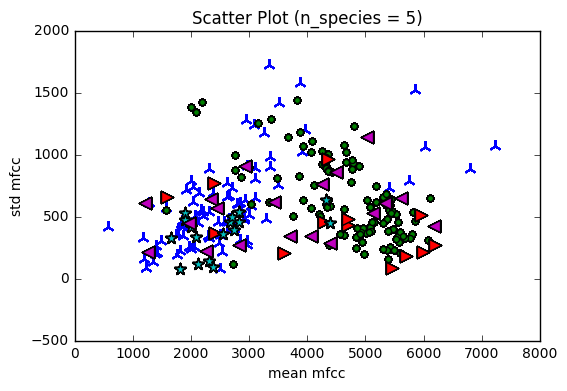

In [27]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean mfcc', 'std mfcc')

## kNN

In [28]:
util.kNN(data, labels, range(3,10), 5)

3-Neighbors | Accuracy: 0.73 (+/- 0.09) | Weight: uniform
3-Neighbors | Accuracy: 0.72 (+/- 0.13) | Weight: distance
4-Neighbors | Accuracy: 0.71 (+/- 0.13) | Weight: uniform
4-Neighbors | Accuracy: 0.71 (+/- 0.14) | Weight: distance
5-Neighbors | Accuracy: 0.71 (+/- 0.13) | Weight: uniform
5-Neighbors | Accuracy: 0.73 (+/- 0.12) | Weight: distance
6-Neighbors | Accuracy: 0.73 (+/- 0.12) | Weight: uniform
6-Neighbors | Accuracy: 0.72 (+/- 0.14) | Weight: distance
7-Neighbors | Accuracy: 0.73 (+/- 0.11) | Weight: uniform
7-Neighbors | Accuracy: 0.72 (+/- 0.12) | Weight: distance
8-Neighbors | Accuracy: 0.71 (+/- 0.12) | Weight: uniform
8-Neighbors | Accuracy: 0.71 (+/- 0.11) | Weight: distance
9-Neighbors | Accuracy: 0.72 (+/- 0.11) | Weight: uniform
9-Neighbors | Accuracy: 0.71 (+/- 0.13) | Weight: distance


## Naïve-Bayes

In [29]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, labels, cv = 5)
print(scores)

[ 0.63461538  0.58823529  0.6122449   0.72916667  0.72340426]


## SVM

In [30]:
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, data, labels, cv = 5)
print(scores)

[ 0.63461538  0.70588235  0.65306122  0.6875      0.63829787]
